<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-2-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [9]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
import pandas as pd

# Convert the 'Class' column to a NumPy array
Y = data['Class'].to_numpy()

Y = pd.Series(Y)

Y

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Length: 90, dtype: int64

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
# students get this 
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [12]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=2
)

we can see we only have 18 test samples.


In [13]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],  # 'l1' for Lasso, 'l2' for Ridge
    'solver': ['lbfgs']  # 'liblinear' is another solver that supports 'l1'
}

# Create a LogisticRegression instance
lr = LogisticRegression()

# Create a GridSearchCV instance with cv=10
logreg_cv = GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    cv=10,  # 10-fold cross-validation
    scoring='accuracy'  # Or any other suitable scoring metric
)

# Fit the GridSearchCV object to the training data (X_train, Y_train should be defined)
logreg_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Best cross-validation score:", logreg_cv.best_score_)

/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Tuned hyperparameters (best parameters): {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.8196428571428571


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [29]:
# Get the best estimator from GridSearchCV
best_model = logreg_cv.best_estimator_

# Calculate the accuracy on the test data
test_accuracy = best_model.score(X_test, Y_test)

print("Test accuracy:", test_accuracy)

Test accuracy: 0.8333333333333334


Lets look at the confusion matrix:


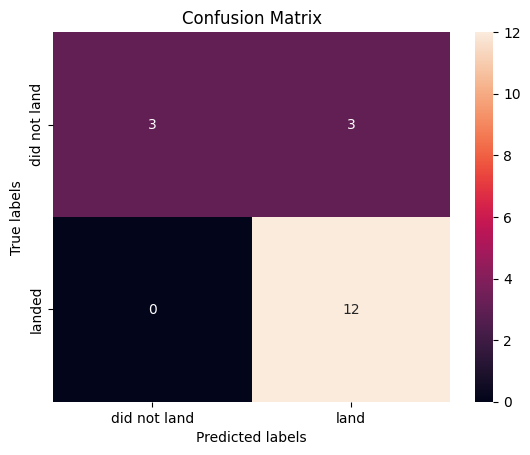

In [30]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVC
parameters = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

# Create an SVC instance
svm = SVC()

# Create a GridSearchCV instance with cv=10
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10,  # 10-fold cross-validation
    scoring='accuracy'  # Or any other suitable scoring metric
)

# Fit the GridSearchCV object to the training data (X_train, Y_train should be defined)
svm_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Best cross-validation score:", svm_cv.best_score_)

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Reduced parameter grid
parameters = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']  # 'auto' is generally less effective than 'scale'
}

# Create an SVC instance
svm = SVC()

# Create a GridSearchCV instance with cv=10
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10,  # 10-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all available cores
)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Best cross-validation score:", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.8196428571428571


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [13]:
# Calculate the accuracy on the test data
test_accuracy = svm_cv.best_estimator_.score(X_test, Y_test)

print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.8333333333333334


We can plot the confusion matrix


In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [15]:
# Necessary imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Create a Decision Tree classifier object
tree = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV instance with cv=10
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,  # 10-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all available cores
)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Best cross-validation score:", tree_cv.best_score_)

Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score: 0.8714285714285713


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [16]:
# Calculate the accuracy on the test data
test_accuracy = tree_cv.best_estimator_.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.7777777777777778


We can plot the confusion matrix


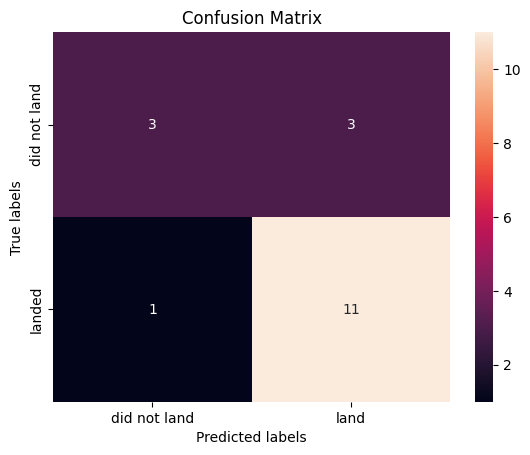

In [17]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [12]:
# Necessary imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a GridSearchCV instance with cv=10
knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=parameters,
    cv=10,  # 10-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all available cores
)

# Fit the GridSearchCV object to the training data
knn_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Best cross-validation score:", knn_cv.best_score_)

Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best cross-validation score: 0.6642857142857143


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [13]:
# Calculate the accuracy on the test data
test_accuracy = knn_cv.best_estimator_.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.6111111111111112


We can plot the confusion matrix


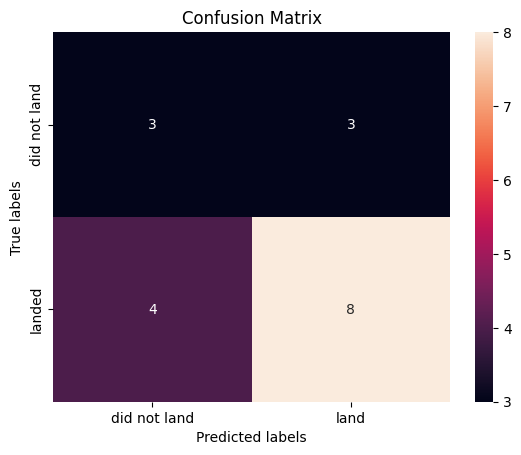

In [14]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [14]:
# Necessary imports
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Define parameter grids for each classifier
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create classifier objects
lr = LogisticRegression()
svm = SVC()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Create GridSearchCV objects for each classifier
cv = 10

lr_cv = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=cv, scoring='accuracy', n_jobs=-1)
svm_cv = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=cv, scoring='accuracy', n_jobs=-1)
tree_cv = GridSearchCV(estimator=tree, param_grid=param_grid_tree, cv=cv, scoring='accuracy', n_jobs=-1)
knn_cv = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV objects to the training data
lr_cv.fit(X_train, Y_train)
svm_cv.fit(X_train, Y_train)
tree_cv.fit(X_train, Y_train)
knn_cv.fit(X_train, Y_train)

# Calculate the accuracy on the test data
lr_test_accuracy = lr_cv.best_estimator_.score(X_test, Y_test)
svm_test_accuracy = svm_cv.best_estimator_.score(X_test, Y_test)
tree_test_accuracy = tree_cv.best_estimator_.score(X_test, Y_test)
knn_test_accuracy = knn_cv.best_estimator_.score(X_test, Y_test)

# Print the best parameters and best score for each model
print("Logistic Regression:")
print("Best parameters:", lr_cv.best_params_)
print("Best cross-validation score:", lr_cv.best_score_)
print("Test set accuracy:", lr_test_accuracy)

print("\nSupport Vector Machine:")
print("Best parameters:", svm_cv.best_params_)
print("Best cross-validation score:", svm_cv.best_score_)
print("Test set accuracy:", svm_test_accuracy)

print("\nDecision Tree:")
print("Best parameters:", tree_cv.best_params_)
print("Best cross-validation score:", tree_cv.best_score_)
print("Test set accuracy:", tree_test_accuracy)

print("\nK-Nearest Neighbors:")
print("Best parameters:", knn_cv.best_params_)
print("Best cross-validation score:", knn_cv.best_score_)
print("Test set accuracy:", knn_test_accuracy)

# Compare the performance
accuracies = {
    'Logistic Regression': lr_test_accuracy,
    'Support Vector Machine': svm_test_accuracy,
    'Decision Tree': tree_test_accuracy,
    'K-Nearest Neighbors': knn_test_accuracy
}

best_model = max(accuracies, key=accuracies.get)
print("\nBest model:", best_model)
print("Best model test set accuracy:", accuracies[best_model])


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Logistic Regression:
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.8196428571428571
Test set accuracy: 0.8333333333333334

Support Vector Machine:
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.8196428571428571
Test set accuracy: 0.8333333333333334

Decision Tree:
Best parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Best cross-validation score: 0.8714285714285713
Test set accuracy: 0.8333333333333334

K-Nearest Neighbors:
Best parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best cross-validation score: 0.6642857142857143
Test set accuracy: 0.6111111111111112

Best model: Logistic Regression
Best model test set accuracy: 0.8333333333333334


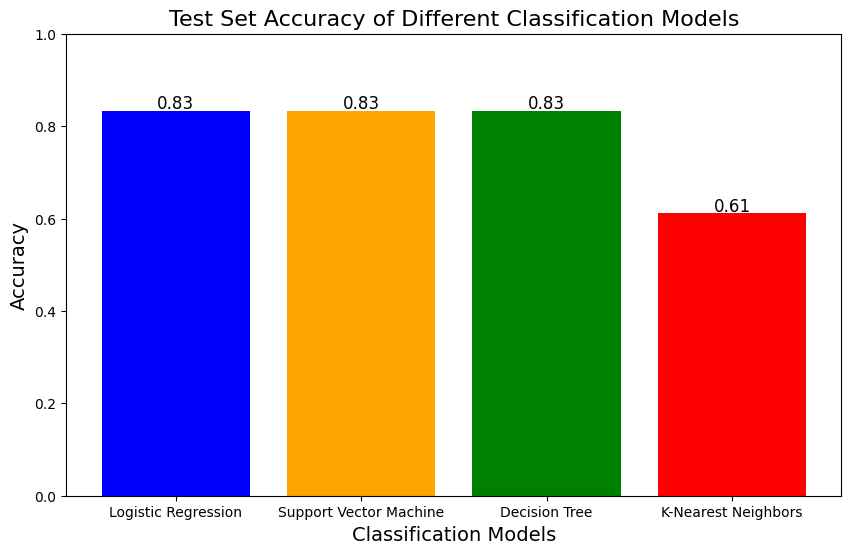

In [15]:
import matplotlib.pyplot as plt

# Accuracy of the models
accuracies = {
    'Logistic Regression': lr_test_accuracy,
    'Support Vector Machine': svm_test_accuracy,
    'Decision Tree': tree_test_accuracy,
    'K-Nearest Neighbors': knn_test_accuracy
}

# Bar chart to visualize the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green', 'red'])

# Adding title and labels
plt.title('Test Set Accuracy of Different Classification Models', fontsize=16)
plt.xlabel('Classification Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Adding the accuracy values on top of the bars
for i, (model, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.005, f"{accuracy:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1)  # Setting y-axis limits from 0 to 1
plt.show()


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
